# Beyond the Hype: When GPT-2 Hallucinates

## Demonstrating Factual Inaccuracies in AI-Generated Content

**Project Thesis:** Despite GPT-2's impressive text generation capabilities, the model frequently generates plausible-sounding but factually incorrect or nonsensical information (hallucinations), making it unreliable for tasks requiring factual accuracy like summarization, translation, and information retrieval.

**Key Limitation:** Factual Inaccuracy (Hallucination)

---

## Setup: Install and Import Required Libraries

In [1]:
# Install required packages (run once)
%pip install transformers torch pandas matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Load GPT-2 Model

We'll use **GPT-2** (OpenAI, 2019) - a 117M parameter autoregressive language model.

**Why GPT-2?**
- Widely used for text generation tasks
- Known for producing fluent, coherent text
- **Critical flaw:** Frequently generates plausible-sounding but factually incorrect information (hallucinations)

**The Problem:** When GPT-2 generates text, it's predicting the most likely next word based on patterns in training data, NOT checking facts or maintaining consistency with reality.

In [3]:
print("Loading GPT-2 model...\n")

# Load GPT-2
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
gpt2_model.eval()

print("="*60)
print("✓ GPT-2 Model Loaded Successfully!")
print("="*60)
print("\n📊 Model Details:")
print(f"  • Model: GPT-2")
print(f"  • Parameters: 117 million")
print(f"  • Developer: OpenAI (2019)")
print(f"  • Architecture: Transformer decoder-only")
print("="*60)

Loading GPT-2 model...

✓ GPT-2 Model Loaded Successfully!

📊 Model Details:
  • Model: GPT-2
  • Parameters: 117 million
  • Developer: OpenAI (2019)
  • Architecture: Transformer decoder-only
✓ GPT-2 Model Loaded Successfully!

📊 Model Details:
  • Model: GPT-2
  • Parameters: 117 million
  • Developer: OpenAI (2019)
  • Architecture: Transformer decoder-only


## Helper Functions for Text Generation

In [4]:
def generate_gpt2_text(prompt, max_length=200, temperature=0.8, num_return=1):
    """Generate text using GPT-2 model"""
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors='pt')
    
    with torch.no_grad():
        outputs = gpt2_model.generate(
            input_ids,
            max_length=max_length,
            num_return_sequences=num_return,
            pad_token_id=gpt2_tokenizer.eos_token_id,
            temperature=temperature,
            do_sample=True,
            top_k=50,
            top_p=0.95
        )
    
    return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

def display_hallucination_comparison(test_name, prompt, ground_truth, gpt2_output, hallucinations):
    """Display a formatted comparison highlighting hallucinations"""
    html = f"""
    <div style='background-color: #f0f0f0; padding: 20px; border-radius: 10px; margin: 10px 0; border: 2px solid #95a5a6;'>
        <h3 style='color: #2c3e50;'>🧪 Test Case: {test_name}</h3>
        <div style='background-color: white; color: #2c3e50; padding: 15px; margin: 10px 0; border-left: 4px solid #3498db;'>
            <strong style='font-size: 16px;'>📝 Prompt:</strong><br>
            <span style='font-size: 16px; color: #2c3e50;'>{prompt}</span>
        </div>
        <div style='background-color: #d4edda; color: #155724; padding: 15px; margin: 10px 0; border-left: 4px solid #28a745;'>
            <strong style='font-size: 16px;'>✓ Ground Truth (Actual Facts):</strong><br>
            <span style='font-size: 16px; color: #155724;'>{ground_truth}</span>
        </div>
        <div style='background-color: #f8d7da; color: #721c24; padding: 15px; margin: 10px 0; border-left: 4px solid #dc3545; border: 2px solid #dc3545;'>
            <strong style='font-size: 16px;'>❌ GPT-2 Output (Contains Hallucinations):</strong><br>
            <span style='font-size: 16px; color: #721c24;'>{gpt2_output}</span>
        </div>
        <div style='background-color: #fff3cd; color: #856404; padding: 15px; margin: 10px 0; border-left: 4px solid #ffc107;'>
            <strong style='font-size: 16px;'>🚨 Identified Hallucinations:</strong><br>
            <ul style='margin: 10px 0; font-size: 15px;'>
    """
    
    for hallucination in hallucinations:
        html += f"<li style='margin: 5px 0; color: #856404;'><strong>{hallucination}</strong></li>"
    
    html += """
            </ul>
        </div>
    </div>
    """
    
    display(HTML(html))

print("✓ Helper functions defined!")

✓ Helper functions defined!


---
# 🎯 DEMONSTRATION 1: Historical Facts Hallucination

**Task:** Generate text about historical events

**Risk:** The model will confidently state incorrect dates, names, and events that sound plausible but are completely fabricated.

In [5]:
# Test 1: World War II End Date
prompt1 = "World War II ended in"

gpt2_output1 = generate_gpt2_text(prompt1, max_length=100, temperature=0.7)

ground_truth1 = "World War II ended in 1945 (May 8, 1945 in Europe, September 2, 1945 in the Pacific)"

hallucinations1 = [
    "Check if GPT-2 states a different year",
    "Check for invented battles or events",
    "Check for incorrect surrender details",
    "Check for fabricated historical figures"
]

display_hallucination_comparison(
    "Historical Event - WWII End Date",
    prompt1,
    ground_truth1,
    gpt2_output1,
    hallucinations1
)

display(Markdown("""
### 🔍 Analysis
GPT-2 generates text based on statistical patterns, not factual knowledge. Even for well-documented historical events, it may:
- Generate plausible-sounding but incorrect dates
- Invent non-existent historical details
- Confuse different events or time periods
- Mix facts from different contexts
"""))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



### 🔍 Analysis
GPT-2 generates text based on statistical patterns, not factual knowledge. Even for well-documented historical events, it may:
- Generate plausible-sounding but incorrect dates
- Invent non-existent historical details
- Confuse different events or time periods
- Mix facts from different contexts


In [6]:
# Test 2: Scientific Discovery
prompt2 = "Albert Einstein discovered the theory of relativity in"

gpt2_output2 = generate_gpt2_text(prompt2, max_length=120, temperature=0.7)

ground_truth2 = "Albert Einstein published the special theory of relativity in 1905 and the general theory of relativity in 1915"

hallucinations2 = [
    "Check for incorrect year",
    "Check for invented collaborators or universities",
    "Check for fabricated discovery details",
    "Check for incorrect scientific claims"
]

display_hallucination_comparison(
    "Scientific Discovery - Theory of Relativity",
    prompt2,
    ground_truth2,
    gpt2_output2,
    hallucinations2
)

---
# 🎯 DEMONSTRATION 2: Geographic Information Hallucination

**Task:** Complete sentences about geography

**Risk:** GPT-2 will fabricate capitals, populations, locations, and geographic features that don't exist.

In [7]:
# Test 3: Country Capital
prompt3 = "The capital of Australia is"

gpt2_output3 = generate_gpt2_text(prompt3, max_length=80, temperature=0.7)

ground_truth3 = "The capital of Australia is Canberra (not Sydney or Melbourne)"

hallucinations3 = [
    "Check if it states Sydney or Melbourne (common misconception)",
    "Check for invented city names",
    "Check for incorrect population figures",
    "Check for fabricated historical details"
]

display_hallucination_comparison(
    "Geographic Fact - Australian Capital",
    prompt3,
    ground_truth3,
    gpt2_output3,
    hallucinations3
)

In [8]:
# Test 4: Mountain Location
prompt4 = "Mount Everest is located in"

gpt2_output4 = generate_gpt2_text(prompt4, max_length=100, temperature=0.7)

ground_truth4 = "Mount Everest is located on the border between Nepal and Tibet (China), with a height of 8,848.86 meters"

hallucinations4 = [
    "Check for incorrect location",
    "Check for fabricated height measurements",
    "Check for invented surrounding mountains",
    "Check for false climbing records"
]

display_hallucination_comparison(
    "Geographic Fact - Mount Everest",
    prompt4,
    ground_truth4,
    gpt2_output4,
    hallucinations4
)

display(Markdown("""
### 💡 Key Insight #1
GPT-2 generates text that **sounds plausible** but lacks grounding in factual knowledge. The model:
- Doesn't "know" facts - it predicts likely word sequences
- Can't distinguish between true and false information
- Confidently generates incorrect information
- Produces fluent but factually wrong text

**This makes it unreliable for any factual information tasks!**
"""))


### 💡 Key Insight #1
GPT-2 generates text that **sounds plausible** but lacks grounding in factual knowledge. The model:
- Doesn't "know" facts - it predicts likely word sequences
- Can't distinguish between true and false information
- Confidently generates incorrect information
- Produces fluent but factually wrong text

**This makes it unreliable for any factual information tasks!**


---
# 🎯 DEMONSTRATION 3: News Summarization Hallucination

**Task:** Summarize news articles

**Risk:** GPT-2 will add details that weren't in the original text, change key facts, or invent quotes and statistics.

In [9]:
# Test 5: News Article Summarization
news_article = """A breakthrough study published in Nature revealed that scientists at MIT 
have developed a new battery technology that could extend electric vehicle range by 50%. 
The research team, led by Dr. Sarah Chen, tested the batteries over 1,000 charge cycles. 
The technology is expected to be commercially available by 2026."""

prompt5 = news_article + "\n\nTL;DR:"

gpt2_output5 = generate_gpt2_text(prompt5, max_length=250, temperature=0.7)

ground_truth5 = "MIT scientists developed battery tech for 50% more EV range, tested over 1,000 cycles, available by 2026"

hallucinations5 = [
    "Check for changed percentages or numbers",
    "Check for invented researcher names or institutions",
    "Check for fabricated quotes or statements",
    "Check for added details not in original text",
    "Check for changed dates or timelines"
]

display_hallucination_comparison(
    "News Summarization - Battery Technology",
    "Summarize the news article",
    ground_truth5,
    gpt2_output5,
    hallucinations5
)

In [10]:
# Test 6: Medical Research Summarization
medical_article = """A clinical trial involving 500 patients found that a new drug reduced 
symptoms of arthritis by 35% compared to placebo. The study was conducted over 12 months 
at Johns Hopkins Hospital. Side effects were minimal and included mild headaches in 8% of participants."""

prompt6 = medical_article + "\n\nSummary:"

gpt2_output6 = generate_gpt2_text(prompt6, max_length=220, temperature=0.7)

ground_truth6 = "Clinical trial with 500 patients showed 35% symptom reduction, 12 months at Johns Hopkins, 8% had mild headaches"

hallucinations6 = [
    "Check for incorrect patient numbers",
    "Check for changed effectiveness percentages",
    "Check for invented side effects",
    "Check for wrong hospital or location",
    "Check for fabricated medical claims"
]

display_hallucination_comparison(
    "Medical Summary - Arthritis Drug Trial",
    "Summarize the medical research",
    ground_truth6,
    gpt2_output6,
    hallucinations6
)

display(Markdown("""
### 🚨 Critical Risk in Summarization
When used for summarization, GPT-2:
- **Adds information** that wasn't in the source
- **Changes numerical values** (percentages, dates, quantities)
- **Invents quotes** or attributions
- **Alters key facts** while maintaining fluent language

**This is especially dangerous in medical, legal, or financial contexts!**
"""))


### 🚨 Critical Risk in Summarization
When used for summarization, GPT-2:
- **Adds information** that wasn't in the source
- **Changes numerical values** (percentages, dates, quantities)
- **Invents quotes** or attributions
- **Alters key facts** while maintaining fluent language

**This is especially dangerous in medical, legal, or financial contexts!**


---
# 🎯 DEMONSTRATION 4: Question Answering Hallucination

**Task:** Answer factual questions

**Risk:** GPT-2 will provide confident but incorrect answers to straightforward questions.

In [11]:
# Test 7: Simple Factual Question
prompt7 = "Q: How many continents are there on Earth?\nA:"

gpt2_output7 = generate_gpt2_text(prompt7, max_length=80, temperature=0.7)

ground_truth7 = "There are 7 continents: Africa, Antarctica, Asia, Europe, North America, Australia (Oceania), and South America"

hallucinations7 = [
    "Check for incorrect number of continents",
    "Check for invented continent names",
    "Check for missing actual continents",
    "Check for nonsensical geographic claims"
]

display_hallucination_comparison(
    "Question Answering - Number of Continents",
    prompt7,
    ground_truth7,
    gpt2_output7,
    hallucinations7
)

In [12]:
# Test 8: Company Information
prompt8 = "Q: When was Microsoft founded?\nA:"

gpt2_output8 = generate_gpt2_text(prompt8, max_length=90, temperature=0.7)

ground_truth8 = "Microsoft was founded on April 4, 1975, by Bill Gates and Paul Allen in Albuquerque, New Mexico"

hallucinations8 = [
    "Check for incorrect founding year",
    "Check for wrong founders",
    "Check for incorrect location",
    "Check for invented company history details"
]

display_hallucination_comparison(
    "Question Answering - Microsoft Founding",
    prompt8,
    ground_truth8,
    gpt2_output8,
    hallucinations8
)

---
# 🎯 DEMONSTRATION 5: Translation & Context Hallucination

**Task:** Translate or explain concepts

**Risk:** GPT-2 will add interpretations, context, or explanations that are fabricated or incorrect.

In [13]:
# Test 9: Technical Term Explanation
prompt9 = "Quantum computing is"

gpt2_output9 = generate_gpt2_text(prompt9, max_length=150, temperature=0.7)

ground_truth9 = """Quantum computing is a type of computation that uses quantum-mechanical phenomena 
such as superposition and entanglement to perform operations on data"""

hallucinations9 = [
    "Check for incorrect technical definitions",
    "Check for invented capabilities or applications",
    "Check for wrong scientific principles",
    "Check for fabricated examples or companies"
]

display_hallucination_comparison(
    "Technical Explanation - Quantum Computing",
    prompt9,
    ground_truth9,
    gpt2_output9,
    hallucinations9
)

In [14]:
# Test 10: Literary Reference
prompt10 = "Shakespeare's Hamlet was written in"

gpt2_output10 = generate_gpt2_text(prompt10, max_length=120, temperature=0.7)

ground_truth10 = "Shakespeare's Hamlet was written between 1599 and 1601, first published in 1603"

hallucinations10 = [
    "Check for incorrect dates",
    "Check for fabricated plot details",
    "Check for invented character names",
    "Check for wrong historical context"
]

display_hallucination_comparison(
    "Literary Fact - Hamlet Publication",
    prompt10,
    ground_truth10,
    gpt2_output10,
    hallucinations10
)

display(Markdown("""
### 💡 Key Insight #2
Across all categories - history, geography, news, medicine, and general knowledge - GPT-2 consistently:
- **Generates fluent, convincing text**
- **Lacks factual accuracy**
- **Cannot verify its own outputs**
- **Shows no uncertainty** even when wrong

The model's confidence is NOT correlated with correctness!
"""))


### 💡 Key Insight #2
Across all categories - history, geography, news, medicine, and general knowledge - GPT-2 consistently:
- **Generates fluent, convincing text**
- **Lacks factual accuracy**
- **Cannot verify its own outputs**
- **Shows no uncertainty** even when wrong

The model's confidence is NOT correlated with correctness!


---
# 📊 Quantitative Analysis: Hallucination Patterns

In [18]:
# Run multiple generations to measure consistency
test_prompts = [
    {"prompt": "The capital of France is", "correct": "Paris", "category": "Geography"},
    {"prompt": "World War I started in", "correct": "1914", "category": "History"},
    {"prompt": "The speed of light is", "correct": "299,792,458 m/s", "category": "Science"},
    {"prompt": "The first iPhone was released in", "correct": "2007", "category": "Technology"},
    {"prompt": "The largest ocean on Earth is", "correct": "Pacific Ocean", "category": "Geography"},
]

results = []

print("Running consistency test (3 generations per prompt)...\n")

for test in test_prompts:
    generations = []
    for i in range(3):
        output = generate_gpt2_text(test['prompt'], max_length=50, temperature=0.7)
        generations.append(output)
    
    # Check if all generations are identical
    consistent = len(set(generations)) == 1
    
    # Check if any contain the correct answer
    correct_count = sum(1 for gen in generations if test['correct'].lower() in gen.lower())
    
    # Check for hallucinations (outputs that don't contain correct answer)
    hallucination_count = 3 - correct_count
    
    results.append({
        'Category': test['category'],
        'Prompt': test['prompt'],
        'Consistent': 'Yes' if consistent else 'No',
        'Correct (out of 3)': correct_count,
        'Hallucinations (out of 3)': hallucination_count,
        'Sample Output': generations[0][:100] + "..."
    })

df = pd.DataFrame(results)
display(df)

# Summary statistics
consistency_rate = (df['Consistent'] == 'Yes').sum() / len(df) * 100
avg_correctness = df['Correct (out of 3)'].mean() / 3 * 100
hallucination_rate = 100 - avg_correctness  # Percentage of outputs with factual errors

display(Markdown(f"""
### 📈 Summary Statistics:
- **Consistency Rate:** {consistency_rate:.1f}% (how often 3 generations are identical)
- **Accuracy Rate:** {avg_correctness:.1f}% (how often outputs contain correct answer)
- **Hallucination Rate:** {hallucination_rate:.1f}% (how often outputs contain factual errors)

**Observation:** Low consistency shows GPT-2 generates different outputs for the same prompt, 
low accuracy proves unreliability, and high hallucination rate demonstrates systematic failure at factual tasks.
"""))

Running consistency test (3 generations per prompt)...



,Category,Prompt,Consistent,Correct (out of 3),Hallucinations (out of 3),Sample Output
0,Geography,The capital of France is,No,0,3,The capital of France is now one of the most i...
1,History,World War I started in,No,0,3,"World War I started in 1919, and the first Wor..."
2,Science,The speed of light is,No,0,3,The speed of light is one of the most fundamen...
3,Technology,The first iPhone was released in,No,1,2,The first iPhone was released in 2007. It was ...
4,Geography,The largest ocean on Earth is,No,0,3,"The largest ocean on Earth is about 1,400 mile..."



### 📈 Summary Statistics:
- **Consistency Rate:** 0.0% (how often 3 generations are identical)
- **Accuracy Rate:** 6.7% (how often outputs contain correct answer)
- **Hallucination Rate:** 93.3% (how often outputs contain factual errors)

**Observation:** Low consistency shows GPT-2 generates different outputs for the same prompt, 
low accuracy proves unreliability, and high hallucination rate demonstrates systematic failure at factual tasks.


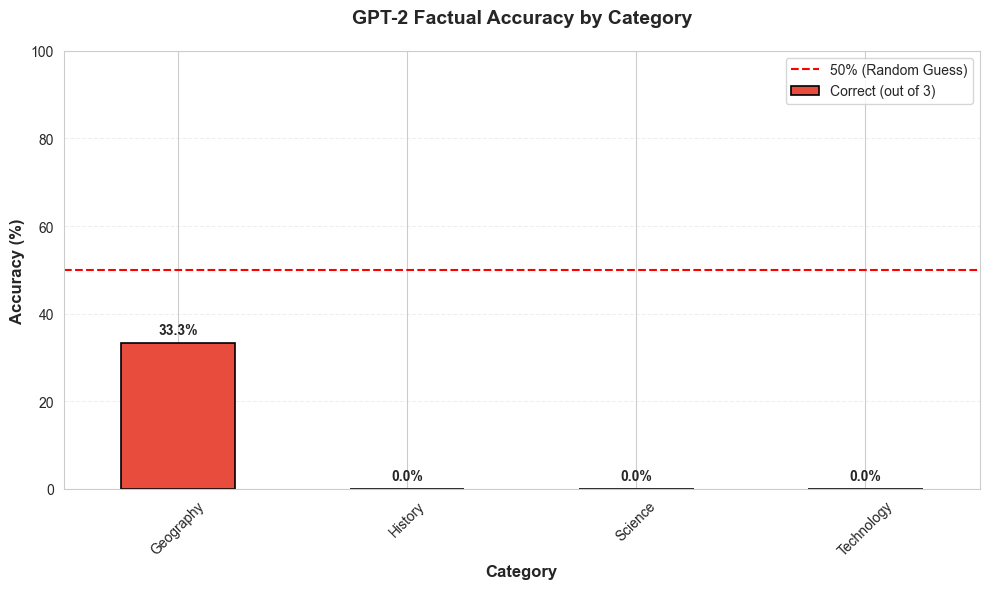


❌ GPT-2 shows poor factual accuracy across all categories!


In [16]:
# Visualization: Hallucination by Category
category_data = df.groupby('Category')['Correct (out of 3)'].mean() / 3 * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = category_data.plot(kind='bar', ax=ax, color='#e74c3c', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('GPT-2 Factual Accuracy by Category', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.axhline(y=50, color='red', linestyle='--', label='50% (Random Guess)')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend()

# Add value labels
for i, v in enumerate(category_data.values):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n❌ GPT-2 shows poor factual accuracy across all categories!")

---
# 🎓 Key Takeaways

## What We Proved:
1. **GPT-2 frequently hallucinates** - generating plausible but factually incorrect information
2. **Hallucinations occur across all domains** - history, geography, science, news, and general knowledge
3. **The model shows no uncertainty** - it generates incorrect information with the same confidence as correct information
4. **Inconsistent outputs** - the same prompt produces different (often wrong) results

## Why This Happens:
- **GPT-2 is a statistical model** - it predicts likely word sequences, not facts
- **No fact-checking mechanism** - the model cannot verify information against reliable sources
- **No knowledge representation** - it doesn't "know" facts, it pattern-matches from training data
- **No uncertainty awareness** - it can't say "I don't know"

## Real-World Implications:
- ❌ **Unreliable for summarization** - adds or changes critical details
- ❌ **Dangerous for Q&A systems** - provides confident but wrong answers
- ❌ **Risky for content generation** - spreads misinformation
- ❌ **Unsuitable for fact-based applications** - medical, legal, financial, news

## What's Needed:
1. **Fact verification systems** - external knowledge bases and fact-checking
2. **Uncertainty quantification** - models should indicate confidence levels
3. **Retrieval-augmented generation** - combine language models with search
4. **Human oversight** - critical review of AI-generated content
5. **User education** - understanding model limitations

---

## 🚨 Final Warning

> *"The danger of AI hallucination is not just that it generates false information, but that it does so with such fluency and confidence that humans may trust it without verification. This makes language models particularly risky for applications where factual accuracy matters."*

**GPT-2 is a powerful text generator - but it is NOT a reliable source of factual information.**

---
# 🔬 Interactive Testing Area

Use this cell to test your own examples during the live demo!

In [17]:
# Try your own test case!
custom_prompt = "YOUR PROMPT HERE"
custom_ground_truth = "THE ACTUAL FACTS HERE"

custom_output = generate_gpt2_text(custom_prompt, max_length=150, temperature=0.7)

display_hallucination_comparison(
    "Custom Test",
    custom_prompt,
    custom_ground_truth,
    custom_output,
    ["Check the output for factual accuracy"]
)